In [ ]:
!pip install deepchem==2.6.1
!pip install shap
!pip install lime
!pip install mols2grid
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.3/608.3 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 16.8 MB/s eta 0:00:00


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.1 MB/s eta 0:00:00


In [ ]:
import deepchem as dc
import shap
from lime import lime_tabular

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import mols2grid

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np
import xlsxwriter
from google.colab import files

np.random.seed(0)
pd.set_option('display.max_rows', None)

In [ ]:
n_features = 1024
limite=24
base_graph = n_features - limite
tasks, datasets, transformers = dc.molnet.load_bbbp(featurization='ecfp')
train_dataset, valid_dataset, test_dataset = datasets

    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=T

In [ ]:
data = train_dataset.to_dataframe()
yaxis = []
for col in data.columns:
      if 'X' in col:
            yaxis.append(col)

In [ ]:
X = train_dataset.X
Y = train_dataset.y

**Explain Your Model with the SHAP Values**

In [ ]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
pd.set_option('display.max_rows', None)

In [ ]:
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=1)
model.fit(X, Y.ravel())  
print(model.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
Y_predict = pd.DataFrame(test_dataset.y, model.predict(test_dataset.X))
Y_predict

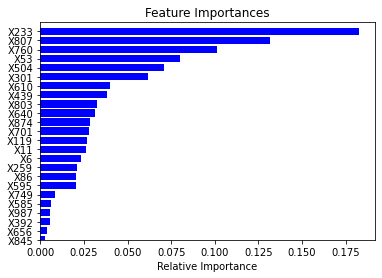

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = train_dataset.X
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [yaxis[i-1] for i in indices])
plt.xlabel('Relative Importance')
plt.ylim(base_graph, n_features)
plt.show()

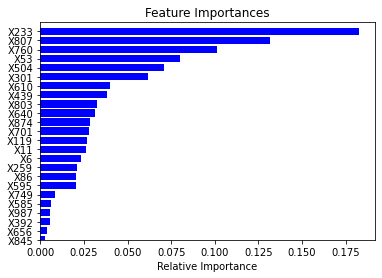

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = test_dataset.X
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [yaxis[i-1] for i in indices])
plt.xlabel('Relative Importance')
plt.ylim(base_graph, n_features)
plt.show()

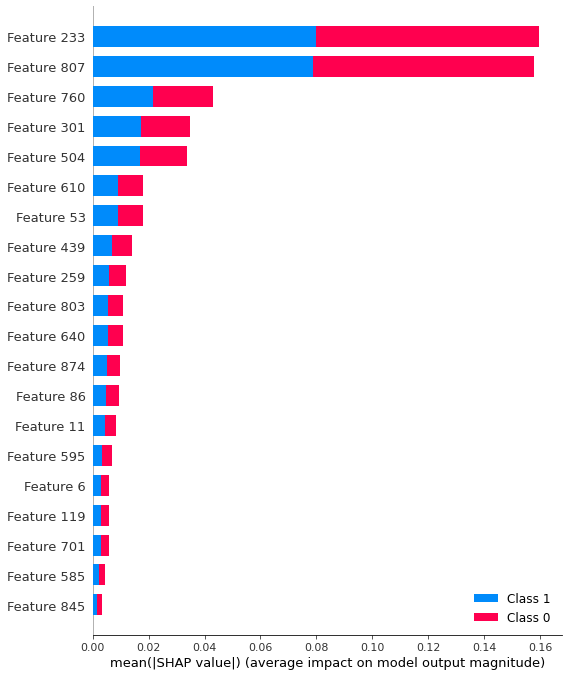

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(train_dataset.X)
shap.summary_plot(shap_values, train_dataset.X, plot_type="bar")

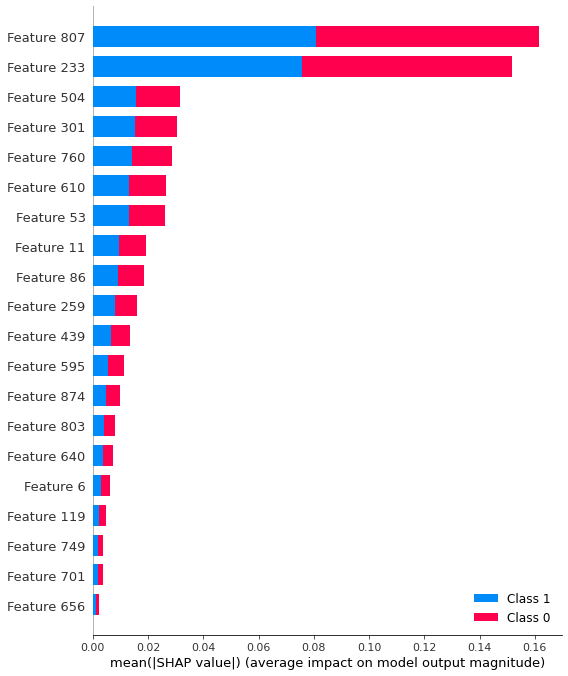

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(test_dataset.X)
shap.summary_plot(shap_values, test_dataset.X, plot_type="bar")

In [ ]:
active_id = np.where(test_dataset.y[:,0] == 0.0)
active_id

(array([  0,   1,   2,   5,  13,  14,  18,  24,  25,  26,  27,  31,  32,
         34,  36,  37,  40,  49,  57,  59,  60,  61,  62,  63,  64,  70,
         71,  72,  73,  74,  75,  76,  79,  80,  81,  82,  85,  90,  91,
         92,  93,  94,  96, 102, 103, 107, 109, 110, 111, 112, 116, 117,
        118, 119, 120, 121, 123, 124, 126, 127, 130, 131, 132, 133, 134,
        135, 138, 142, 143, 144, 145, 146, 147, 148, 152, 153, 154, 155,
        156, 160, 166, 167, 168, 170, 172, 173, 174, 175, 176, 177, 179,
        183, 184, 185, 186, 188, 195]),)

In [ ]:
# 1d array to list
arr_1 = np.array(active_id[0])

print(f'NumPy Array:\n{arr_1}')

active_id_list = arr_1.tolist()

print(f'List: {active_id_list}')

NumPy Array:
[  0   1   2   5  13  14  18  24  25  26  27  31  32  34  36  37  40  49
  57  59  60  61  62  63  64  70  71  72  73  74  75  76  79  80  81  82
  85  90  91  92  93  94  96 102 103 107 109 110 111 112 116 117 118 119
 120 121 123 124 126 127 130 131 132 133 134 135 138 142 143 144 145 146
 147 148 152 153 154 155 156 160 166 167 168 170 172 173 174 175 176 177
 179 183 184 185 186 188 195]
List: [0, 1, 2, 5, 13, 14, 18, 24, 25, 26, 27, 31, 32, 34, 36, 37, 40, 49, 57, 59, 60, 61, 62, 63, 64, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 85, 90, 91, 92, 93, 94, 96, 102, 103, 107, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 130, 131, 132, 133, 134, 135, 138, 142, 143, 144, 145, 146, 147, 148, 152, 153, 154, 155, 156, 160, 166, 167, 168, 170, 172, 173, 174, 175, 176, 177, 179, 183, 184, 185, 186, 188, 195]


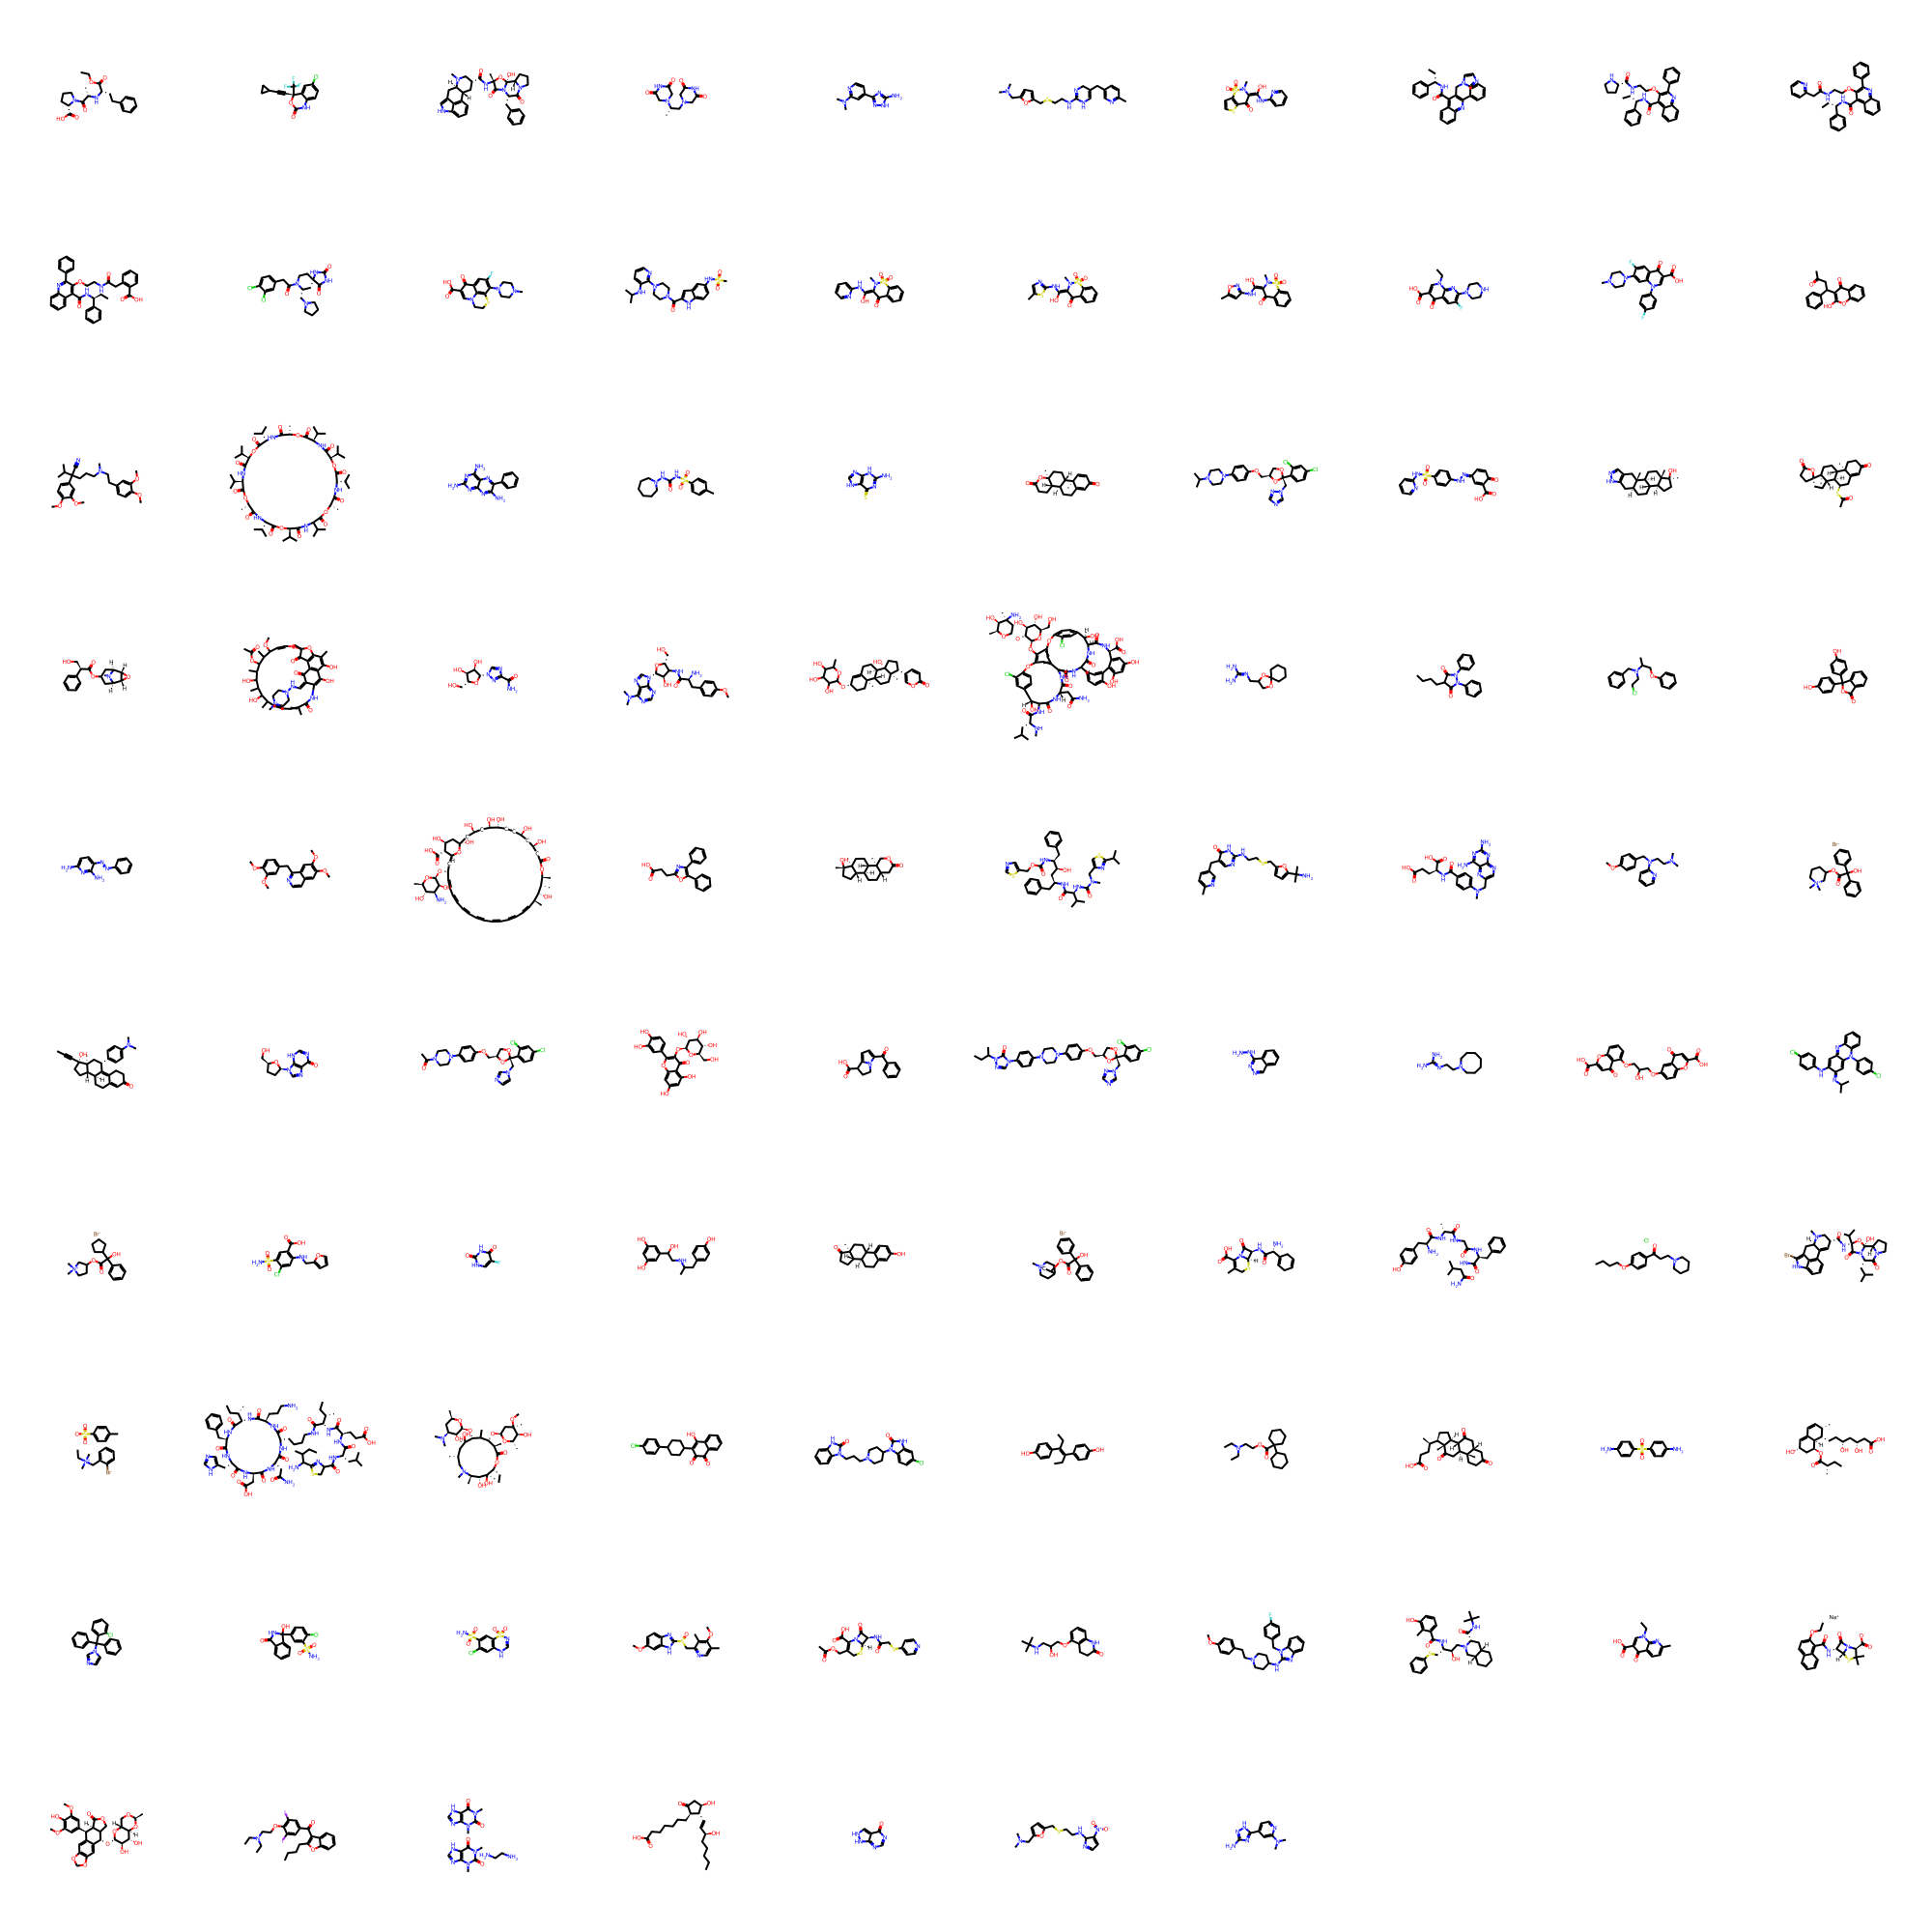

In [ ]:
mol_list = []
for id in active_id_list:
  mol = Chem.MolFromSmiles(test_dataset.ids[id])
  mol_list.append(mol)
img =Draw.MolsToGridImage(mol_list, molsPerRow = 10, maxMols = 150)
img

,smiles,id,Molecule
0,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N2CCC[...,0,
1,FC(F)(F)[C@]1(OC(=O)Nc2ccc(Cl)cc12)C#CC3CC3,1,
2,CN1C[C@@H](C[C@H]2[C@H]1Cc3c[nH]c4cccc2c34)C(=...,2,
3,C[C@@H](CN1CC(=O)NC(=O)C1)N2CC(=O)NC(=O)C2,5,
4,c1(nccc(c1)c1nc([nH]n1)N)N(C)C,13,
5,CN(C)Cc1oc(cc1)CSCCNC=1NC=C(CN1)Cc1cnc(cc1)C,14,
6,CN1C(=C(\O)Nc2ccccn2)/C(=O)c3sccc3[S]1(=O)=O,18,
7,c1cc2c(C(N[C@@H](CC)c3ccccc3)=O)c(c(nc2cc1)c1c...,24,
8,c1cc2c(c(c(c3ccccc3)nc2cc1)OCCNC([C@@H]1CCCN1)...,25,
9,c1cc2c(c(OCCNC(Cc3ncccc3)=O)c(c3ccccc3)nc2cc1)...,26,

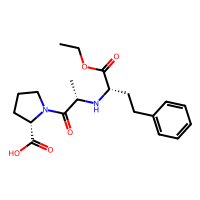
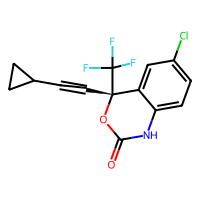
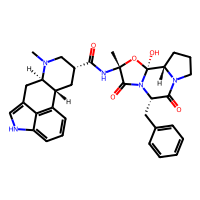
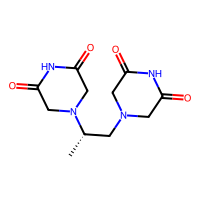
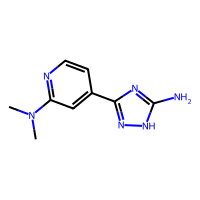
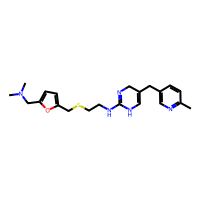
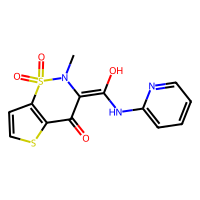
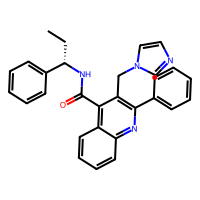
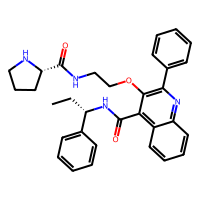
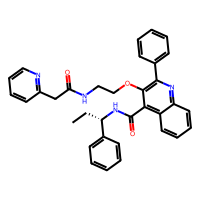
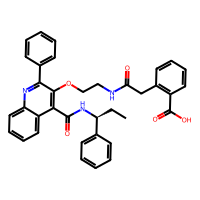
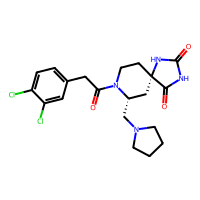
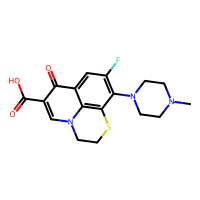
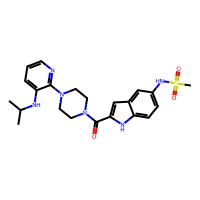
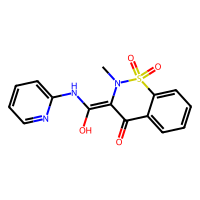
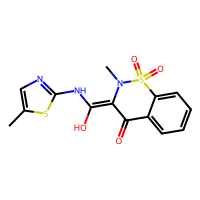
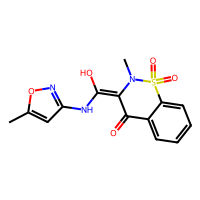
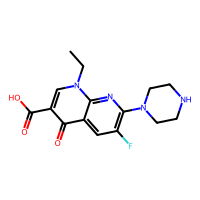
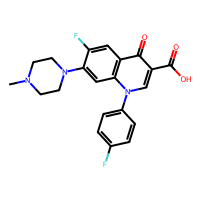
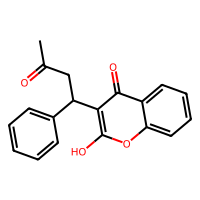
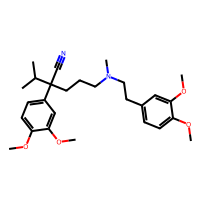
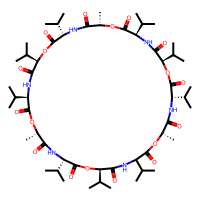
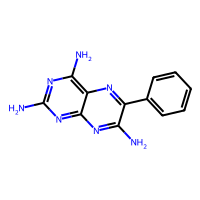
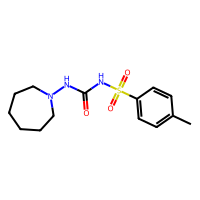
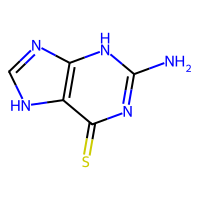
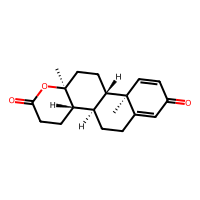
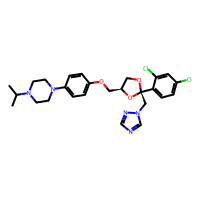
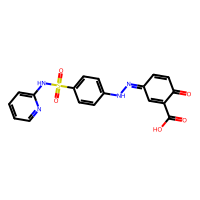
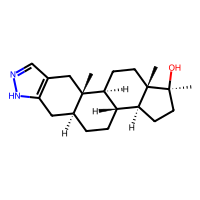
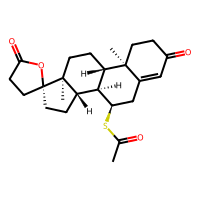
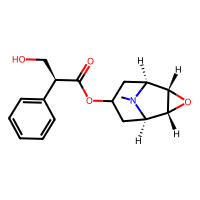
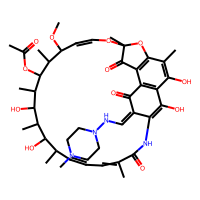
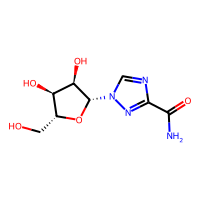
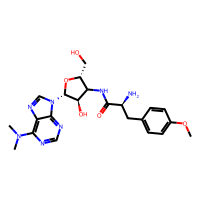
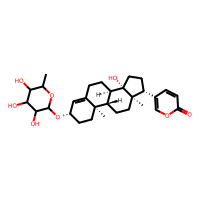
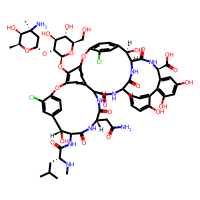
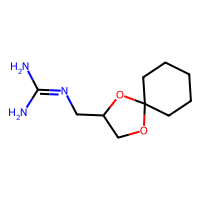
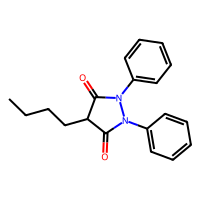
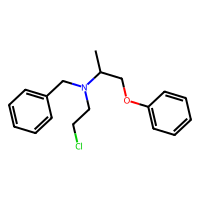
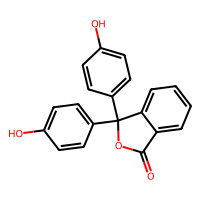
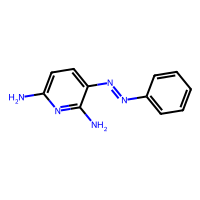
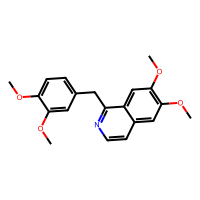
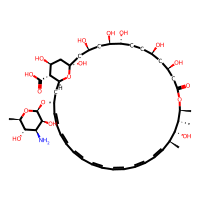
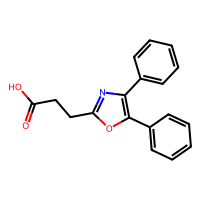
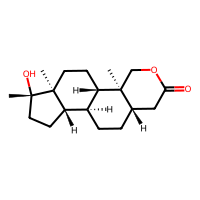
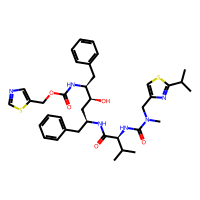
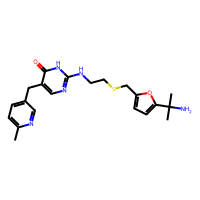
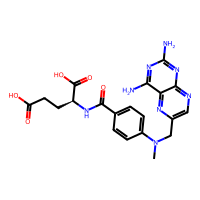
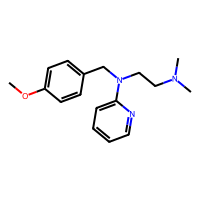
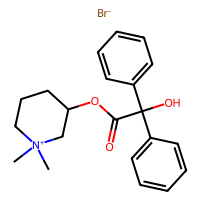
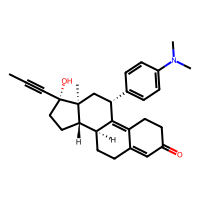
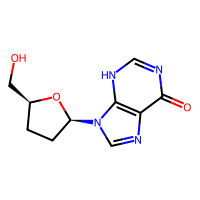
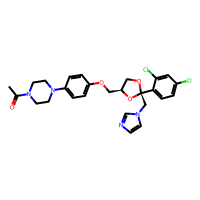
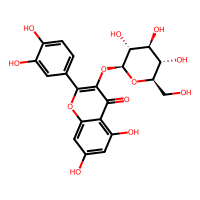
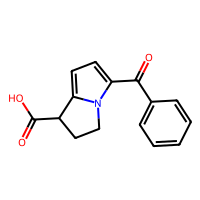
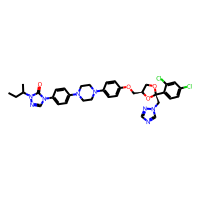
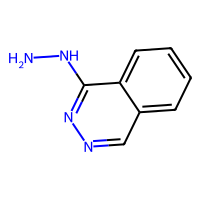
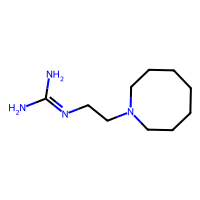
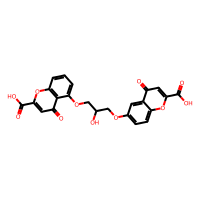
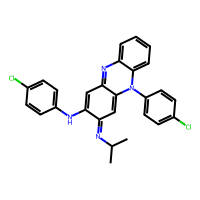
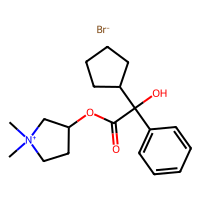
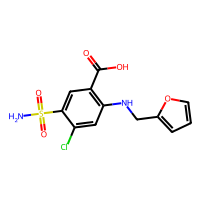
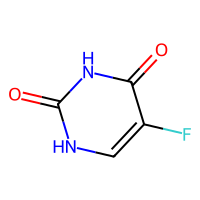
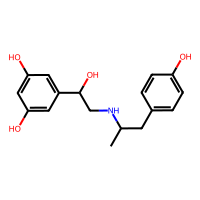
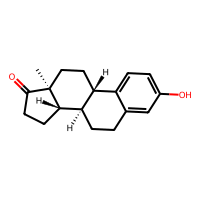
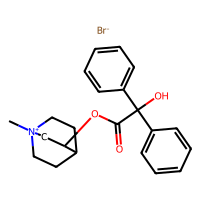
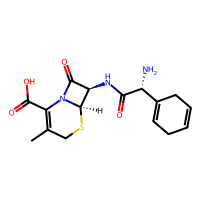
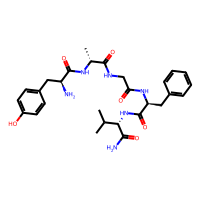
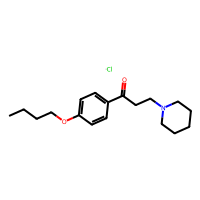
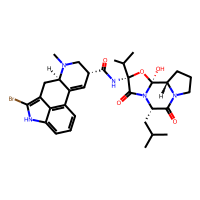
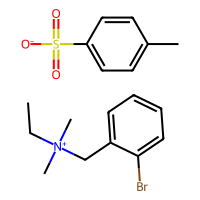
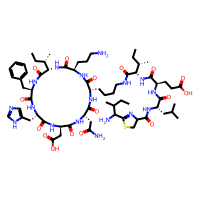
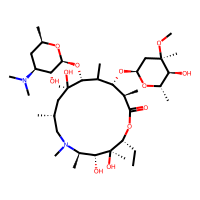
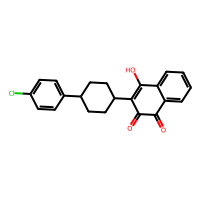
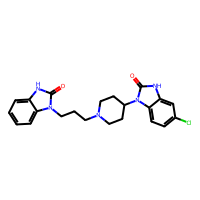
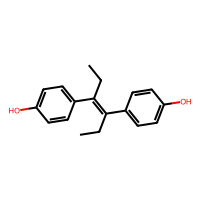
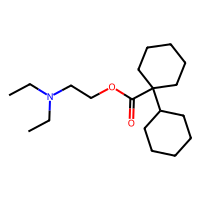
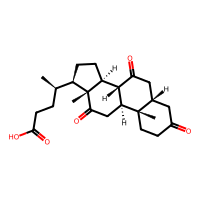
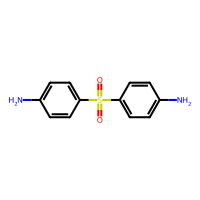
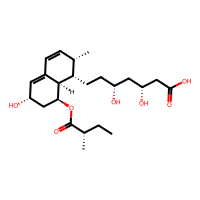
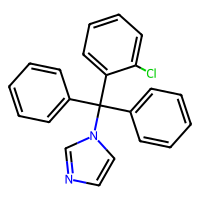
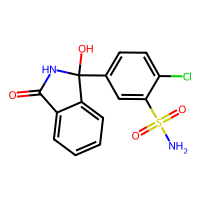
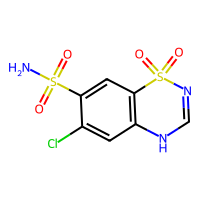
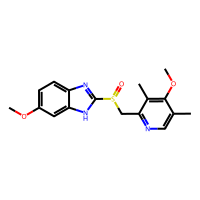
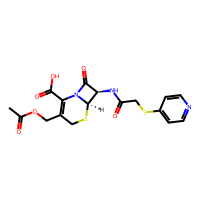
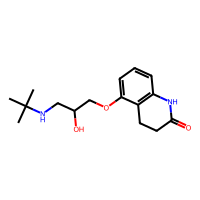
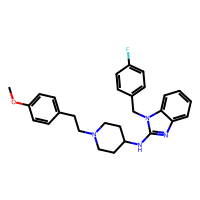
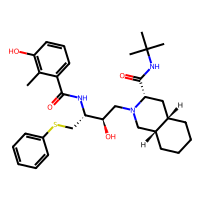
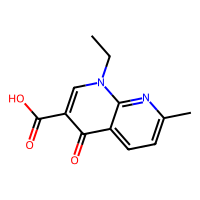
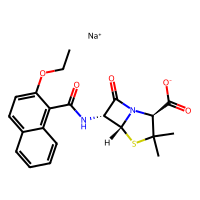
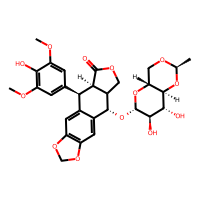
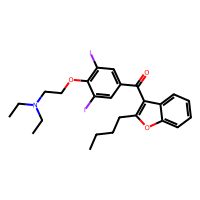
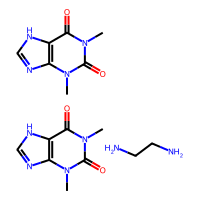
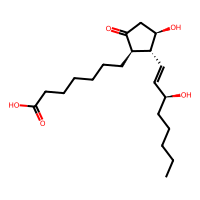
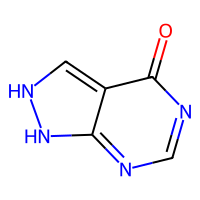
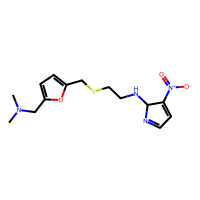
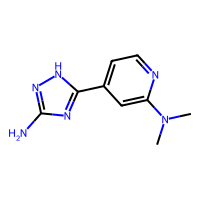

In [ ]:
df = pd.DataFrame({'smiles': test_dataset.ids[active_id_list], 'id': active_id_list})
PandasTools.AddMoleculeColumnToFrame(df,'smiles','Molecule')
df

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

def scaffold_svg(mol):
  scaffold = MurckoScaffold.GetScaffoldForMol(mol)
  d = Draw.MolDraw2DSVG(160, 120)
  d.DrawMolecule(scaffold)
  d.FinishDrawing()
  return d.GetDrawingText()

df["scaffold"] = df["Molecule"].apply(scaffold_svg)
mols2grid.display(df, mol_col="Molecule", subset=["mols2grid-id", "img", "scaffold"])

MolGridWidget()

In [ ]:
active_id_list

In [ ]:
figure_list = []
smiles_list = []
for id in active_id_list:
  bi = {}
  params = Chem.SmilesParserParams()
  params.removeHs = False
  m = Chem.MolFromSmiles(test_dataset.ids[id], params)
  if m is not None:
    Chem.Kekulize(m, clearAromaticFlags=True)
  fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024, bitInfo = bi)
  fp_arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, fp_arr)
  np.nonzero(fp_arr)
  list(fp.GetOnBits())

  #remover X e converter para inteiro
  caract=[]
  for linha in [yaxis[i-1] for i in indices]:
      nova_linha=linha.replace("X","")
      numero=int(nova_linha)
      caract.append(numero)
  caract.reverse()
  first_elem=caract[0:limite]
  legends = [int(x) for x in fp.GetOnBits()]

  #comparar feat_reverse com legends

  result = set(first_elem) & set(legends)
#  print(list(result))
# To remove the empty list
  if len(result) != 0:
     prints = [(m, x, bi) for x in list(result)]
     figure = Draw.DrawMorganBits(prints, molsPerRow = 4, legends = [str(x) for x in list(result)])
     figure.save("figure"+str(id)+".png","png")
     figure_list.append("figure"+str(id)+".png")
     smiles_list.append(test_dataset.ids[id])

df = pd.DataFrame({'smiles': smiles_list})
PandasTools.AddMoleculeColumnToFrame(df,'smiles','Molecule')
df['Fragments'] = figure_list
df

In [ ]:
from IPython.display import display,HTML,IFrame

# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="600" >'

df['Fragments'] = figure_list
image_cols = ['Molecule','Fragments']

pd.set_option('display.max_colwidth', None)

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html


display(HTML(df.to_html(escape=False ,formatters=format_dict)))

In [ ]:
figure_list = []
for id in active_id_list:
  bi = {}
  params = Chem.SmilesParserParams()
  params.removeHs = False
  m = Chem.MolFromSmiles(test_dataset.ids[id], params)
  if m is not None:
    Chem.Kekulize(m, clearAromaticFlags=True)
  fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024, bitInfo = bi)
  fp_arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, fp_arr)
  np.nonzero(fp_arr)
  list(fp.GetOnBits())

  #remover X e converter para inteiro
  caract=[]
  for linha in [yaxis[i-1] for i in indices]:
      nova_linha=linha.replace("X","")
      numero=int(nova_linha)
      caract.append(numero)
  caract.reverse()
  first_elem=caract[0:limite]
  legends = [int(x) for x in fp.GetOnBits()]
  #comparar feat_reverse com legends

  result = set(first_elem) & set(legends)
#  print(list(result))
# To remove the empty list
  if len(result) != 0:
     prints = [(m, x, bi) for x in list(result)]
     display(Chem.MolFromSmiles(test_dataset.ids[id]), Draw.DrawMorganBits(prints, molsPerRow = 4, legends = [str(x) for x in list(result)]))

In [ ]:
n_tasks = len(tasks)
n_features = train_dataset.get_data_shape()[0]
model = dc.models.MultitaskClassifier(n_tasks, n_features)
model.fit(train_dataset, nb_epoch=400)

In [ ]:
import numpy as np
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
print("Train scores")
print(model.evaluate(train_dataset, [metric], transformers))
print("Validation scores")
print(model.evaluate(valid_dataset, [metric], transformers))

In [ ]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(1024)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X, 
                                              feature_names=feature_names, 
                                              categorical_features=feature_names,
                                              class_names=['non-penetration', 'penetration'], 
                                              discretize_continuous=True)

In [ ]:
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)
def eval_model(my_model):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=1)
        # The 0th task is p_np
        predictions = my_model.predict(ds)[:,0]
        return predictions
    return eval_closure

model_fn = eval_model(model)

In [ ]:
def fp_mol(mol, fp_length=1024):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=1024)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d

**LIME loop**

In [ ]:
fragment_list = []
for id in active_id_list:
    exp = explainer.explain_instance(test_dataset.X[id], model_fn, num_features=100, top_labels=1)
    key = list(exp.as_map().keys())[0]
    my_fragments = fp_mol(Chem.MolFromSmiles(test_dataset.ids[id]))
    fragment_weight = dict(exp.as_map()[key])
    for index in my_fragments:
        if index in fragment_weight:
           m = Chem.MolFromSmiles(test_dataset.ids[id])
           substructure = Chem.MolFromSmarts(list(my_fragments[index])[0])
           m.GetSubstructMatches(substructure)
           fragment_list.append({'id': id, 'Smiles': test_dataset.ids[id], 'p': key, 'index': index, 'fragments': my_fragments[index], 'weight': fragment_weight[index], 'Highlights': m})
df1 = pd.DataFrame(fragment_list)
df1

In [ ]:
df1.shape

In [ ]:
df1['p'].shape-df1['p'].sum()

In [ ]:
(df1['p'].shape-df1['p'].sum())/df1['p'].shape

In [ ]:
!pip install XlsxWriter
import xlsxwriter

PandasTools.SaveXlsxFromFrame(df1, 'bbbp(0)_fulllist.xlsx', molCol='Highlights', size=(100, 100))

from google.colab import files
files.download('bbbp(0)_fulllist.xlsx')

In [ ]:
df1 = df1.loc[(df1['p']) == 0]
df1

In [ ]:
df1.shape

In [ ]:
df1 = df1.loc[(df1['weight']) > 0.0]
df1

In [ ]:
df1.shape

In [ ]:
#Unsetting set object of column fragments in df1
for (j,set_smiles) in enumerate(df1['fragments']): #el = set_smiles
  if  set_smiles == None or len(set_smiles) == 0:
       df1['fragments'].iloc[j] = np.nan

  elif len(set_smiles) > 1: #If fp is activated by more than one fragment
        k = j
        for smi in set_smiles:
            if smi != '': #Passing by possible bug (Empty smile)
               if k == j: #Represents the first smile of the set of smiles
                    df1['fragments'].iloc[k] = smi
                    k = df1.shape[0] #From now on k will be always the index of the new adding row
               else:
                     df1.loc[k] = df1.iloc[j] #copying data of original row (all the information, exept smile)
                     df1['fragments'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
  else:
       df1['fragments'].iloc[j] = list(set_smiles)[0]

In [ ]:
df1 = df1.drop_duplicates(subset=['fragments'], keep='first')
df1

In [ ]:
df1.shape

In [ ]:
df1 = df1.sort_values(by=['weight'],ascending=False)
PandasTools.AddMoleculeColumnToFrame(df1,'Smiles','Molecule')
df1

In [ ]:
PandasTools.SaveXlsxFromFrame(df1, 'bbbp(0)_list.xlsx', molCol='Highlights', size=(100, 100))

from google.colab import files
files.download('bbbp(0)_list.xlsx')

In [ ]:
df1_filtered = df1.loc[(df1['weight']) > 0.1]
PandasTools.AddMoleculeColumnToFrame(df1_filtered,'Smiles','Molecule')
df1_filtered

In [ ]:
df1_filtered.shape

In [ ]:
PandasTools.SaveXlsxFromFrame(df1_filtered, 'bbbp(0)_list_filtered.xlsx', molCol='Highlights', size=(100, 100))

from google.colab import files
files.download('bbbp(0)_list_filtered.xlsx')